In [33]:
from aaff import aaff,alc_deriv_grad_nuc,alc_differential_grad_nuc
from FcMole import FcM
from alch_deriv import alch_deriv
from pyscf import gto,scf
import numpy as np 
from numpy.linalg import norm as norm
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from pyscf.grad import rhf as grhf
from pyscf.hessian import rhf as hrhf
import basis_set_exchange as bse
from FDcoeffs import *
from pyscf.geomopt.berny_solver import optimize
ang2bohr=1.8897261246
bohr2ang=.5291772109

In [34]:
l=3.3376
x=-(1/24)**.5*l
z=(2/3)**.5*l+x
ch4str="C 0 0 0; H 0 0  {}; H  0  {} {}; H {} {} {}; H {} {} {}".format(z,l/3**.5,x,l/2,-l*3**.5/6,x,-l/2,-l*3**.5/6,x)

In [35]:
CH4=gto.M(atom=ch4str,unit="bohr",basis={"H":"pc-2",'C':bse.get_basis("pcX-2",fmt="nwchem",elements=[6])})
mf = scf.RHF(CH4)
mf.scf()
ge0=mf.Gradients().grad_elec()
g0=mf.Gradients().grad()

converged SCF energy = -40.2151804034983
--------------- RHF gradients ---------------
         x                y                z
0 C    -0.0000000000    -0.0000000000     0.0000000000
1 H    -0.0000000000    -0.0000000000    -0.0000007926
2 H    -0.0000000000    -0.0000007473     0.0000002642
3 H    -0.0000006472     0.0000003736     0.0000002642
4 H     0.0000006472     0.0000003736     0.0000002642
----------------------------------------------


In [36]:
ch4coords=CH4.atom_coords()

In [37]:
ges=[]
af=[]
dl=.1
for i in range(-2,3):
    CH4_p=FcM(fcs=[i*dl,0,0,0,-i*dl],atom=ch4str,unit="bohr",basis={"H":"pc-2",'C':bse.get_basis("pcX-2",fmt="nwchem",elements=[6])})
    mf_p = scf.RHF(CH4_p)
    mf_p.scf(dm0=mf_p.init_guess_by_1e())
    ges.append(mf_p.Gradients().grad_elec())
    af.append(aaff(mf_p,[1,0,0,0,-1]))

converged SCF energy = -37.589225638503
converged SCF energy = -38.8771643174894
converged SCF energy = -40.2151804034971
converged SCF energy = -41.6026363391304
converged SCF energy = -43.0388427656976


In [38]:
CH4_T=FcM(fcs=[1,0,0,0,-1],atom=ch4str,unit="bohr",basis={"H":"pc-2",'C':bse.get_basis("pcX-2",fmt="nwchem",elements=[6])})
mf_T = scf.RHF(CH4_T)
mf_T.scf(dm0=mf_T.init_guess_by_1e())
geT=mf_T.Gradients().grad_elec()
afT=aaff(mf_T,[1,0,0,0,-1])

converged SCF energy = -56.2053208898246


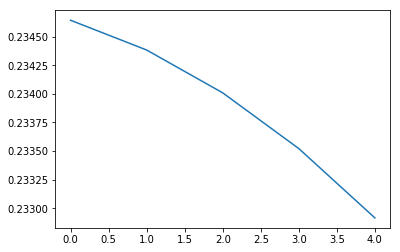

In [39]:
plt.plot([x[1,2]for x in af] )

In [40]:
af[2]

array([[-1.1981676 , -0.69176239, -0.48914987],
       [-0.05738844, -0.03313323,  0.23400893],
       [-0.05738844,  0.20958132, -0.10924128],
       [ 0.15280853, -0.1544905 , -0.10924128],
       [ 1.16013594,  0.6698048 ,  0.47362351]])

In [41]:
(ges[3]-ges[1])/2/dl

array([[-1.19757899, -0.69142255, -0.48890958],
       [-0.05737371, -0.03312473,  0.23398994],
       [-0.05737371,  0.20956626, -0.10922694],
       [ 0.15280285, -0.15447022, -0.10922694],
       [ 1.15952356,  0.66945124,  0.47337351]])

In [42]:
geT

array([[-1.40613462e+00, -8.11832199e-01, -5.74052053e-01],
       [-5.00934672e-02, -2.89214768e-02,  1.88573378e+00],
       [-5.00934672e-02,  1.76824637e+00, -6.55845358e-01],
       [ 1.50629954e+00, -9.27505400e-01, -6.55845358e-01],
       [ 2.20071915e-05,  1.27058580e-05,  8.98439833e-06]])

In [49]:
norm((geT-ge0)[:4])

1.7702829824072344

In [50]:
ge1=ge0+af[2]
norm((geT-ge1)[:4])

0.2552423433575969

In [45]:
ge2=ge1+(af[3]-af[1])/(2*dl)/2

In [46]:
norm((geT-ge2)[:4])

0.09864932729207143

In [53]:
ge3=ge2+(af[3]-2*af[2]+af[1])/dl**2/6

In [54]:
norm((geT-ge3)[:4])

0.027083563405324928

In [55]:
geT,ge3

(array([[-1.40613462e+00, -8.11832199e-01, -5.74052053e-01],
        [-5.00934672e-02, -2.89214768e-02,  1.88573378e+00],
        [-5.00934672e-02,  1.76824637e+00, -6.55845358e-01],
        [ 1.50629954e+00, -9.27505400e-01, -6.55845358e-01],
        [ 2.20071915e-05,  1.27058580e-05,  8.98439833e-06]]),
 array([[-1.42815428, -0.82454526, -0.58304154],
        [-0.0489097 , -0.02823803,  1.88618681],
        [-0.0489097 ,  1.7689013 , -0.655352  ],
        [ 1.50745861, -0.92680769, -0.655352  ],
        [ 0.01851507,  0.01068968,  0.00755874]]))